Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90       266
           1       0.98      0.95      0.96       802

    accuracy                           0.95      1068
   macro avg       0.92      0.94      0.93      1068
weighted avg       0.95      0.95      0.95      1068


Sample predictions:
       Vaccinated  Cured  Deaths  Outbreak_Actual  Outbreak_Predicted  \
1158           1     96      22                1                   1   
1860           1      6       0                0                   0   
3089           1   2443      71                1                   1   
803            0      0       0                0                   0   
168            0      0       0                0                   0   

      Outbreak_Probability  
1158              1.000000  
1860              0.001429  
3089              1.000000  
803               0.130650  
168               0.130650  


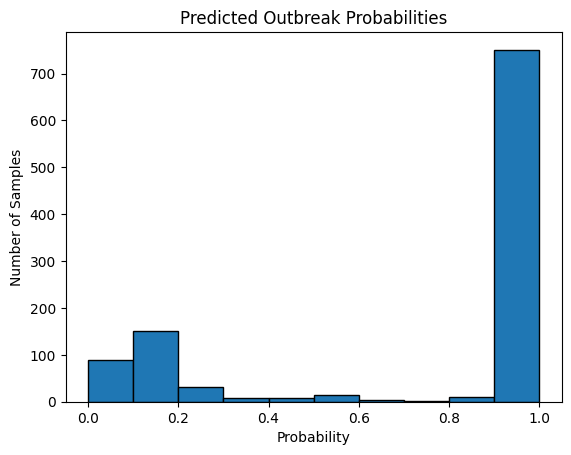


Probability of getting COVID-19 per state:


Average predicted outbreak probability per state:

Andaman and Nicobar Islands: 0.4895
Andhra Pradesh: 0.8336
Arunachal Pradesh: 0.5888
Assam: 0.7762
Bihar: 0.8155
Cases being reassigned to states: 0.1172
Chandigarh: 0.7070
Chhattisgarh: 0.7084
Dadar Nagar Haveli: 0.1256
Dadra and Nagar Haveli and Daman and Diu: 1.0000
Delhi: 0.8549
Goa: 0.7246
Gujarat: 0.9277
Haryana: 0.8352
Himachal Pradesh: 0.7368
Jammu and Kashmir: 0.9076
Jharkhand: 0.8865
Karnataka: 0.8489
Kerala: 0.6297
Ladakh: 0.6898
Madhya Pradesh: 0.9714
Maharashtra: 0.9498
Manipur: 0.6252
Meghalaya: 0.4612
Mizoram: 0.5585
Nagaland: 0.6450
Odisha: 0.7360
Puducherry: 0.5930
Punjab: 0.8498
Rajasthan: 0.9098
Sikkim: 0.7630
Tamil Nadu: 0.7779
Telangana: 1.0000
Telengana: 0.7239
Tripura: 0.8927
Uttar Pradesh: 0.9295
Uttarakhand: 0.6421
West Bengal: 0.7534


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("india_cases.csv")

# 2. Clean data
df = df.drop(columns=["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"])
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%y")

# 3. Simulate 'Vaccinated' data (random 0-1 values or percentages)
np.random.seed(42)
df["Vaccinated"] = np.random.randint(0, 2, size=len(df))  # 0 or 1

# 4. Define 'Outbreak' → 1 if Confirmed cases > threshold (say 50)
df["Outbreak"] = df["Confirmed"].apply(lambda x: 1 if x > 50 else 0)

# 5. Feature selection
features = ["Vaccinated", "Cured", "Deaths"]
X = df[features]
y = df["Outbreak"]

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 9. Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))

# 10. Add probability predictions to test set
results = X_test.copy()
results["Outbreak_Actual"] = y_test.values
results["Outbreak_Predicted"] = y_pred
results["Outbreak_Probability"] = y_proba

# 11. Display a few results
print("\nSample predictions:\n", results.head())

# Optional: Plot probability distribution
plt.hist(y_proba, bins=10, edgecolor='k')
plt.title("Predicted Outbreak Probabilities")
plt.xlabel("Probability")
plt.ylabel("Number of Samples")
plt.show()
print("\nProbability of getting COVID-19 per state:\n")
# 12. Merge predictions back with original dataframe (to get 'State/UnionTerritory' info)
test_indices = y_test.index
df_test = df.loc[test_indices].copy()
df_test["Outbreak_Probability"] = y_proba

# 13. Group by state and calculate mean probability
state_probabilities = df_test.groupby("State/UnionTerritory")["Outbreak_Probability"].mean()

# 14. Print probability per state
print("\nAverage predicted outbreak probability per state:\n")
for state, prob in state_probabilities.items():
    print(f"{state}: {prob:.4f}")

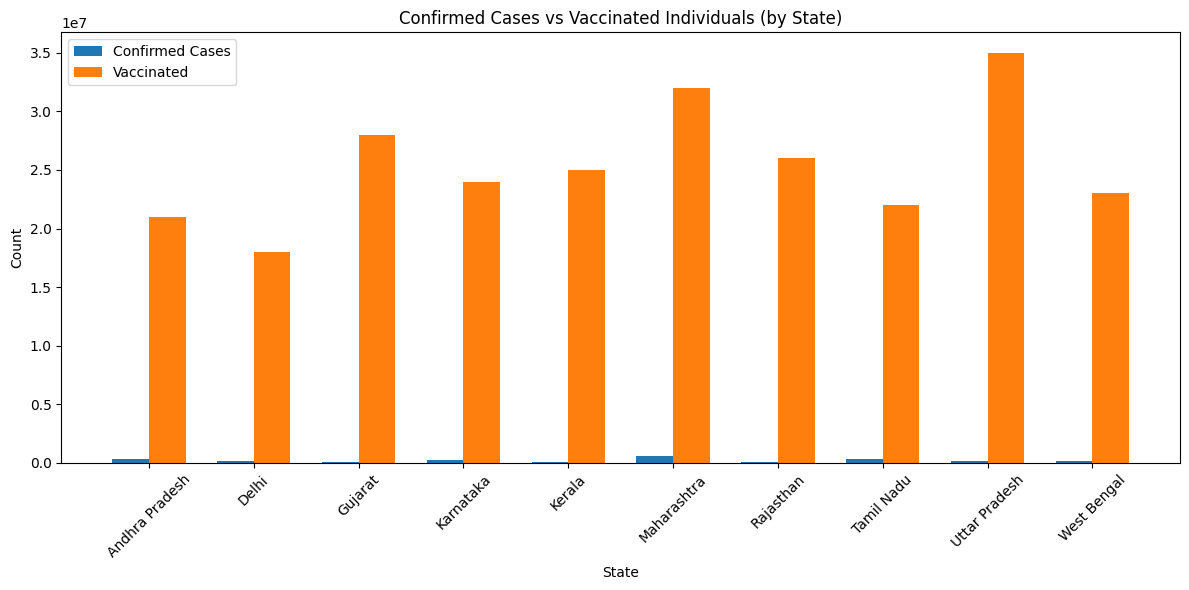


Probability of getting COVID-19 per state:

Andhra Pradesh: 0.014124
Delhi: 0.008520
Gujarat: 0.002847
Karnataka: 0.009720
Kerala: 0.001846
Maharashtra: 0.018886
Rajasthan: 0.002409
Tamil Nadu: 0.015634
Uttar Pradesh: 0.004520
West Bengal: 0.005199


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your uploaded CSV file
cases_df = pd.read_csv('/Users/soumya/Desktop/codezilla/india_cases.csv')

# Step 2: Take the latest confirmed number for each state
latest_cases = cases_df.groupby('State/UnionTerritory').tail(1)[['State/UnionTerritory', 'Confirmed']]

# Step 3: Manually create vaccination data (OR replace this with real data if available)
vaccination_data = {
    'State/UnionTerritory': [
        'Kerala', 'Maharashtra', 'Delhi', 'Tamil Nadu', 'Karnataka',
        'Andhra Pradesh', 'Uttar Pradesh', 'Gujarat', 'Rajasthan', 'West Bengal'
    ],
    'total_doses_administered': [
        25000000, 32000000, 18000000, 22000000, 24000000,
        21000000, 35000000, 28000000, 26000000, 23000000
    ]
}
vacc_df = pd.DataFrame(vaccination_data)

# Step 4: Merge cases and vaccination data
merged_df = pd.merge(latest_cases, vacc_df, on='State/UnionTerritory')

# Step 5: Plot total confirmed cases vs vaccinated individuals
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(merged_df))

plt.bar(index, merged_df['Confirmed'], bar_width, label='Confirmed Cases')
plt.bar([i + bar_width for i in index], merged_df['total_doses_administered'], bar_width, label='Vaccinated')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Confirmed Cases vs Vaccinated Individuals (by State)')
plt.xticks([i + bar_width / 2 for i in index], merged_df['State/UnionTerritory'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Print probability of getting COVID-19 per state
print("\nProbability of getting COVID-19 per state:\n")
for _, row in merged_df.iterrows():
    if row["total_doses_administered"] > 0:
        probability = row["Confirmed"] / row["total_doses_administered"]
        print(f"{row['State/UnionTerritory']}: {probability:.6f}")
    else:
        print(f"{row['State/UnionTerritory']}: Vaccination data not available")

In [6]:
# ...existing code...
print(df.head())  # Prints the first 5 rows
# or to print all rows:
# print(df)
# ...existing code...

   Unnamed: 0       Date State/UnionTerritory  Cured  Deaths  Confirmed  \
0           0 2020-01-30               Kerala      0       0          1   
1           1 2020-01-31               Kerala      0       0          1   
2           2 2020-02-01               Kerala      0       0          2   
3           3 2020-02-02               Kerala      0       0          3   
4           4 2020-02-03               Kerala      0       0          3   

   Vaccinated  Outbreak  
0           0         0  
1           1         0  
2           0         0  
3           0         0  
4           0         0  
